In [1]:
credit<-read.csv("credit.csv")
str(credit)

'data.frame':	1000 obs. of  21 variables:
 $ checking_balance    : chr  "< 0 DM" "1 - 200 DM" "unknown" "< 0 DM" ...
 $ months_loan_duration: int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history      : chr  "critical" "repaid" "critical" "repaid" ...
 $ purpose             : chr  "radio/tv" "radio/tv" "education" "furniture" ...
 $ amount              : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_balance     : chr  "unknown" "< 100 DM" "< 100 DM" "< 100 DM" ...
 $ employment_length   : chr  "> 7 yrs" "1 - 4 yrs" "4 - 7 yrs" "4 - 7 yrs" ...
 $ installment_rate    : int  4 2 2 2 3 2 3 2 2 4 ...
 $ personal_status     : chr  "single male" "female" "single male" "single male" ...
 $ other_debtors       : chr  "none" "none" "none" "guarantor" ...
 $ residence_history   : int  4 2 3 4 4 4 4 2 4 2 ...
 $ property            : chr  "real estate" "real estate" "real estate" "building society savings" ...
 $ age                 : int  67 22 49 45 53 35 53 35 61 28 ..

In [2]:
table(credit$checking_balance)


    < 0 DM   > 200 DM 1 - 200 DM    unknown 
       274         63        269        394 

In [3]:
table(credit$savings_balance)


     < 100 DM     > 1000 DM  101 - 500 DM 501 - 1000 DM       unknown 
          603            48           103            63           183 

In [4]:
table(credit$default)


  1   2 
700 300 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



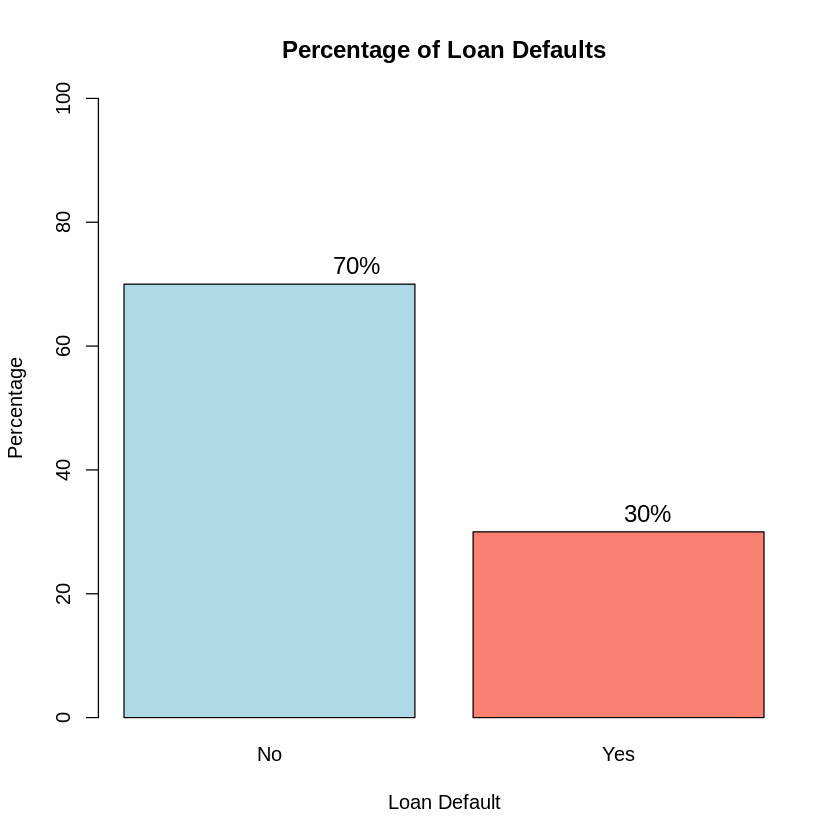

In [7]:
install.packages("ggplot2")
library(ggplot2)

# Compute proportions
default_table <- table(credit$default)
default_percent <- prop.table(default_table) * 100

# Create a bar plot with percentages
barplot(default_percent,
         col = c("lightblue", "salmon"),
         main = "Percentage of Loan Defaults",
         xlab = "Loan Default",
         ylab = "Percentage",
         names.arg = c("No", "Yes"),
         ylim = c(0, 100))

# Add text labels
text(x = c(1, 2),
      y = default_percent + 3,
      labels = paste0(round(default_percent, 1), "%"),       cex = 1.2)

In [8]:
set.seed(12345)
credit_rand <- credit[order(runif(1000)), ]
summary(credit_rand$amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1366    2320    3271    3972   18424 

In [9]:
head(credit$amount)
head(credit_rand$amount)

[1] 1169 5951 2096 7882 4870 9055

[1] 1199 2576 1103 4020 1501 1568

In [10]:
credit_train <- credit_rand[1:900, ]
credit_test <- credit_rand[901:1000, ]
prop.table(table(credit_train$default))


        1         2 
0.7022222 0.2977778 

In [11]:
prop.table(table(credit_test$default))


   1    2 
0.68 0.32 

In [12]:
install.packages("C50")
library(C50)
credit_train$default <- as.factor(credit_train$default)
credit_model <- C5.0(credit_train[-17], credit_train$default)
credit_model

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’, ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘Cubist’, ‘partykit’





Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)

Classification Tree
Number of samples: 900 
Number of predictors: 20 

Tree size: 57 

Non-standard options: attempt to group attributes


In [13]:
summary(credit_model)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)


C5.0 [Release 2.07 GPL Edition]  	Fri Feb 28 09:19:34 2025
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (21 attributes) from undefined.data

Decision tree:

checking_balance = unknown: 1 (358/44)
checking_balance in {< 0 DM,1 - 200 DM,> 200 DM}:
:...foreign_worker = no:
    :...installment_plan in {none,stores}: 1 (17/1)
    :   installment_plan = bank:
    :   :...residence_history <= 3: 2 (2)
    :       residence_history > 3: 1 (2)
    foreign_worker = yes:
    :...credit_history in {fully repaid,fully repaid this bank}: 2 (61/20)
        credit_history in {critical,repaid,delayed}:
        :...months_loan_duration <= 11: 1 (76/13)
            months_loan_duration > 11:
            :...savings_balance = > 1000 DM: 1 (13)
                savings_balance in {< 100 DM,101 - 500 DM,501 - 1000 DM,
                :                   unknown}:
                :...checking_bala

In [14]:
install.packages("gmodels")
credit_pred <- predict(credit_model, credit_test)
library(gmodels)
CrossTable(credit_test$default, credit_pred, prop.chisq=FALSE, prop.c= FALSE, dnn = c('actual default', 'predict'))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’





 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predict 
actual default |         1 |         2 | Row Total | 
---------------|-----------|-----------|-----------|
             1 |        54 |        14 |        68 | 
               |     0.794 |     0.206 |     0.680 | 
               |     0.540 |     0.140 |           | 
---------------|-----------|-----------|-----------|
             2 |        11 |        21 |        32 | 
               |     0.344 |     0.656 |     0.320 | 
               |     0.110 |     0.210 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        65 |        35 |       100 | 
---------------|-----------|-----------|-----------|

 


In [15]:
credit_boost10 <- C5.0(credit_train[-17], credit_train$default, trials =10)
credit_boost10


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)

Classification Tree
Number of samples: 900 
Number of predictors: 20 

Number of boosting iterations: 10 
Average tree size: 47.3 

Non-standard options: attempt to group attributes


In [16]:
summary(credit_boost10)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Fri Feb 28 09:22:12 2025
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (21 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

checking_balance = unknown: 1 (358/44)
checking_balance in {< 0 DM,1 - 200 DM,> 200 DM}:
:...foreign_worker = no:
    :...installment_plan in {none,stores}: 1 (17/1)
    :   installment_plan = bank:
    :   :...residence_history <= 3: 2 (2)
    :       residence_history > 3: 1 (2)
    foreign_worker = yes:
    :...credit_history in {fully repaid,fully repaid this bank}: 2 (61/20)
        credit_history in {critical,repaid,delayed}:
        :...months_loan_duration <= 11: 1 (76/13)
            months_loan_duration > 11:
            :...savings_balance = > 1000 DM: 1 (13)
                savings_balance in {< 100 DM,101 - 500 DM,501 - 1000 DM,
                :                   unknow

In [17]:
credit_boost_pred10 <- predict(credit_boost10, credit_test)
CrossTable(credit_test$default, credit_boost_pred10, prop.chisq=FALSE, prop.c= FALSE, dnn = c('actual default', 'predicted default'))



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |         1 |         2 | Row Total | 
---------------|-----------|-----------|-----------|
             1 |        63 |         5 |        68 | 
               |     0.926 |     0.074 |     0.680 | 
               |     0.630 |     0.050 |           | 
---------------|-----------|-----------|-----------|
             2 |        16 |        16 |        32 | 
               |     0.500 |     0.500 |     0.320 | 
               |     0.160 |     0.160 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        79 |        21 |       100 | 
---------------|-----------|-----------|-----------|

 


In [18]:
error_cost <- matrix(c(0, 1, 4, 0), nrow = 2)
error_cost

0,4
1,0


In [20]:
credit_cost <- C5.0(credit_train[-17], credit_train$default, costs = error_cost)

Warning message:
“no dimnames were given for the cost matrix; the factor levels will be used”


In [21]:
credit_cost_pred <- predict(credit_cost, credit_test)
CrossTable(credit_test$default, credit_cost_pred,
              prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
              dnn = c('actual default', 'predicted default'))



 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |         1 |         2 | Row Total | 
---------------|-----------|-----------|-----------|
             1 |        38 |        30 |        68 | 
               |     0.380 |     0.300 |           | 
---------------|-----------|-----------|-----------|
             2 |         5 |        27 |        32 | 
               |     0.050 |     0.270 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        43 |        57 |       100 | 
---------------|-----------|-----------|-----------|

 
